<a href="https://colab.research.google.com/github/lathiyadhruvraj/Deep-Learning/blob/main/CIFAR10%20(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [24]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
x_test.shape

(10000, 32, 32, 3)

In [27]:
y_train.shape

(50000, 1)

In [28]:
y_test.shape

(10000, 1)

In [29]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [30]:
y_train.shape

(50000,)

In [31]:
# SCALING

x_train = x_train/255.0
x_test = x_test/255.0

In [32]:
#no of classes
print(set(np.unique(y_train)))
K = len(np.unique(y_train))
K

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


10

In [33]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

0: airplane <br>
1: automobile <br>
2: bird <br>
3: cat <br>
4: deer <br>
5: dog <br>
6: frog <br>
7: horse <br>
8: ship <br>
9: truck

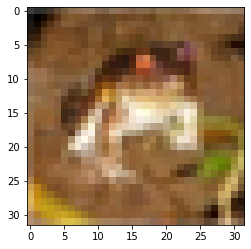

In [34]:
plt.imshow(x_train[0])

no: 7255 , category: 1


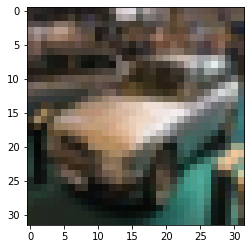

no: 18816 , category: 6


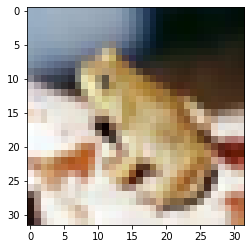

no: 27516 , category: 0


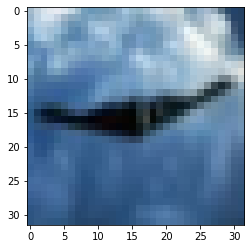

no: 15108 , category: 3


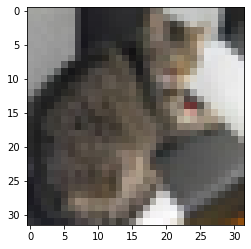

no: 38114 , category: 5


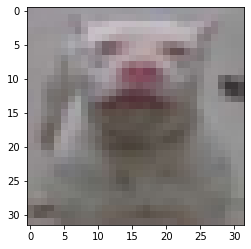

In [35]:
for i in np.random.randint(50000, size=5):
  print("no:",i,", category:",y_train[i])
  plt.imshow(x_train[i])
  plt.show()

no: 1163 , category: 3


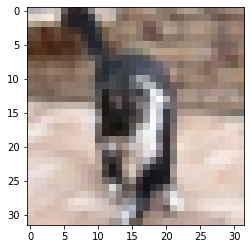

no: 7644 , category: 3


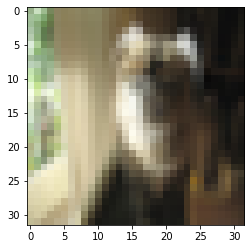

no: 7915 , category: 3


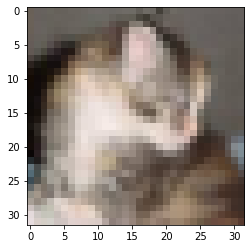

no: 1599 , category: 5


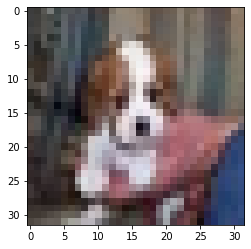

no: 7216 , category: 2


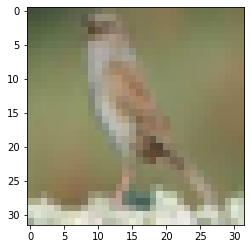

In [36]:
for i in np.random.randint(10000, size=5):
  print("no:",i,", category:",y_test[i])
  plt.imshow(x_test[i])
  plt.show()

In [37]:
x_train[0].shape

(32, 32, 3)

In [38]:
# Build the model

i = Input(shape= x_train[0].shape)
x = Conv2D(32,  (3,3), padding="same", strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(i)
x = Conv2D(64, (3,3), padding="same", strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(x)
x = Conv2D(128, (3,3), padding="same", strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1048, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(x)
x = Dropout(0.4)(x)
x = Dense(1048, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(x)
x = Dropout(0.4)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [39]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 39s 4ms/step - loss: 1.7579 - accuracy: 0.3525 - val_loss: 1.2800 - val_accuracy: 0.5400
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3291 - accuracy: 0.5200 - val_loss: 1.1574 - val_accuracy: 0.5873
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1799 - accuracy: 0.5784 - val_loss: 1.0481 - val_accuracy: 0.6289
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0950 - accuracy: 0.6086 - val_loss: 0.9728 - val_accuracy: 0.6559
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0334 - accuracy: 0.6376 - val_loss: 0.9810 - val_accuracy: 0.6513
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0031 - accuracy: 0.6484 - val_loss: 0.9744 - val_accuracy: 0.6528
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9772 - accuracy: 0.6529 - val_loss: 0.9530 - val_accuracy

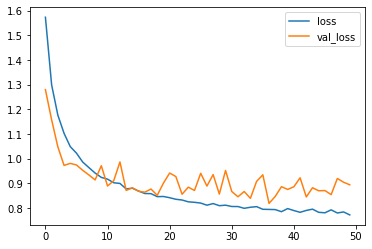

In [41]:
#Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

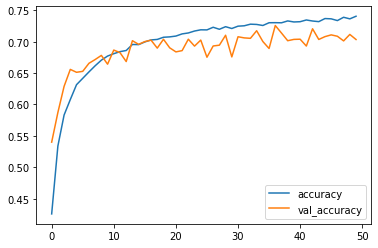

In [42]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()